<a href="https://colab.research.google.com/github/bryanfree66/colab_notebooks/blob/master/sentiment_analysis_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Identification Work Sample
## Data Description


1.   Number of records: 20000
2.   Text data
3.   Two string data type values per record
4.   Tagged for Sentiment (Positive, Negative, Neutral)

[Dataset link](http://archive.ics.uci.edu/ml/datasets/Roman+Urdu+Data+Set)

## Goal
* Train a sentiment classifier on the corpus of the dataset 
* Maximize accuracy of the classifier
* I want to be more sensitive to identifying negative

## Plan of Work
1. Load and clean up the data
2. Do some exploratory data analysis
3. Filter out Roman Urdu stop words
4. Evaluate creating additional features
5. Vectorize reviews
6. Train and evaluate model(s)
7. Select best model based on accuracy

### Load the Data

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
original_data = pd.read_csv('/content/drive/My Drive/working_data/roman_urdu/Roman Urdu DataSet.csv',
                            encoding='utf8')
clean_copy = original_data.copy()
print('Original data shape: {}'.format(original_data.shape))

Original data shape: (20228, 3)


I can see right away the dataset is not the shape I expected. The data description has two columns, but we seem to be picking up an extra column from the CSV.

### Initial Cleaning

In [202]:
original_data.head()

,Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus,Positive,Unnamed: 2
0,sahi bt h,Positive,NaN
1,"Kya bt hai,",Positive,NaN
2,Wah je wah,Positive,NaN
3,Are wha kaya bat hai,Positive,NaN
4,Wah kya baat likhi,Positive,NaN


It looks like an extra I wasn`t expecting. I´m also going to rename the first columns. I will set up a data pipeline later to automate all of the changes. 

I´ll start by renaming the columns for convenience.

In [0]:
original_data.columns = ['review','target','unexpected']

In [204]:
original_data.head()

,review,target,unexpected
0,sahi bt h,Positive,NaN
1,"Kya bt hai,",Positive,NaN
2,Wah je wah,Positive,NaN
3,Are wha kaya bat hai,Positive,NaN
4,Wah kya baat likhi,Positive,NaN


In [205]:
original_data['unexpected'].value_counts()

till here           2
-------             1
------              1
----------          1
----------------    1
9090                1
Name: unexpected, dtype: int64

I´m going to go ahead and drop the extra column.

In [0]:
original_data.drop('unexpected', axis=1, inplace=True)

In [207]:
original_data['target'].value_counts()

Neutral     8929
Positive    6012
Negative    5286
Neative        1
Name: target, dtype: int64

We also have an unexpected value in our labels. We will have to account for that in the pipeline as well. I´m going to drop it, because I can´t automate for every spelling error in the labels.

In [208]:
correct_labels = ['Positive', 'Negative', 'Neutral']
original_data = original_data[original_data.target.isin(correct_labels)]
original_data['target'].value_counts()

Neutral     8929
Positive    6012
Negative    5286
Name: target, dtype: int64

Now, I´m going to check for nulls.

In [209]:
original_data.isnull().sum()

review    1
target    0
dtype: int64

Null values in either of these columns invalidates the record, so I´m just going to drop the null review.

In [0]:
original_data.dropna(inplace=True)

In [211]:
original_data.isnull().sum()

review    0
target    0
dtype: int64

In [212]:
original_data.duplicated().sum()

543

We also have several duplicated records. Given context, it should be safe to remove those as well.

In [213]:
original_data.drop_duplicates(subset=None, keep='first', inplace=True)
original_data.describe()

,review,target
count,19683,19683
unique,19662,3
top,Hahahha,Neutral
freq,2,8585


## Data Exploration

Let´s take a look at the label distribution in our dataset

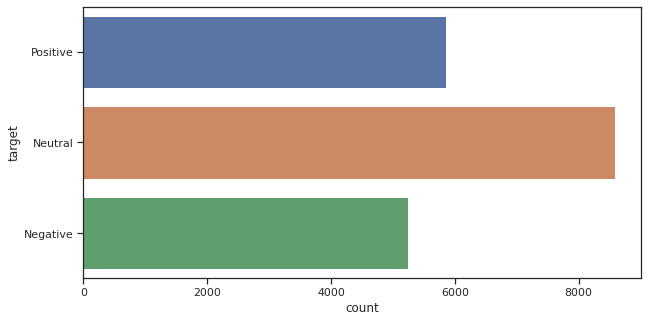

In [214]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(y=original_data.target);

It looks like we have a few more neural reviews than positive or negative. Positive and negative counts are close enough.

When the class distribution is unbalanced, accuracy is considered a poor choice of evaluation of classifier. This is due the fact that models favor predicting the most frequent class.

If I drop the neutrals, my positive and negative reviews are pretty balance. In this case, since I am not all that interested in neutral reviews, that is what I am going to do.

In [0]:
original_data = original_data[original_data.target != 'Neutral']
original_data = original_data.reset_index(drop=True)

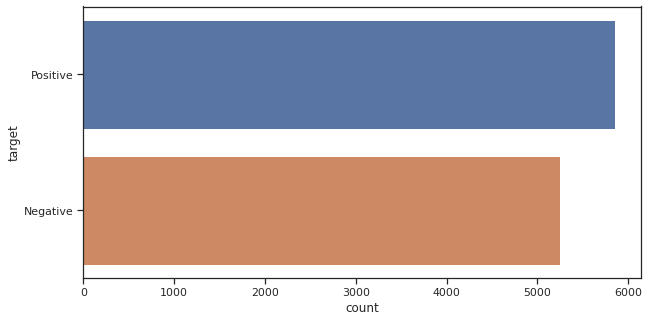

In [219]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(y=original_data.target);

Now, let me have a look at the unique word count.

In [220]:
words = ' '.join(word.lower() for word in original_data.review)
print ('There are {} words in the reviews.'.format(len(words)))
del words

There are 918429 words in the reviews.
